# 場景理解

# 資料讀取

In [124]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))

In [125]:
train_data = pd.read_csv('train.csv')

In [126]:
test_data = pd.read_csv('test.csv')

# 初步評估資料

In [127]:
train_data.head()

,id,playerID,yearID,stint,teamID,lgID,W,L,G,GS,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary_next_year
0,0,nelsoge01,1986,1,CHA,AL,6,6,54,1,...,3.000,3.000,0.000,488.000,26.000,52,nan,nan,nan,365000.000
1,1,moyerja01,1997,1,SEA,AL,17,5,30,30,...,3.000,7.000,0.000,787.000,0.000,82,nan,nan,nan,2000000.000
2,2,thompbr01,2008,1,SLN,NL,6,3,26,6,...,2.000,3.000,0.000,273.000,10.000,38,nan,nan,nan,650000.000
3,3,powerte01,1986,1,CIN,NL,10,6,56,10,...,5.000,1.000,1.000,537.000,30.000,59,nan,nan,nan,500000.000
4,4,osunaan01,2003,1,NYA,AL,2,5,48,0,...,3.000,2.000,0.000,232.000,16.000,22,nan,nan,nan,750000.000


In [128]:
test_data.head()

,id,playerID,yearID,stint,teamID,lgID,W,L,G,GS,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,6284,cormirh01,2000,1,BOS,AL,3,3,64,0,...,2.000,1.000,0.000,0.000,293.000,12.000,40,nan,nan,nan
1,6285,reyesde01,2003,1,PIT,NL,0,0,12,0,...,1.000,5.000,0.000,0.000,50.000,4.000,13,nan,nan,nan
2,6286,runyase01,1999,1,DET,AL,0,1,12,0,...,1.000,2.000,1.000,0.000,45.000,2.000,4,nan,nan,nan
3,6287,byrdpa01,2002,1,KCA,AL,17,11,33,33,...,1.000,3.000,7.000,1.000,935.000,0.000,111,nan,nan,nan
4,6288,parkch01,2006,1,SDN,NL,7,7,24,21,...,7.000,5.000,10.000,0.000,606.000,0.000,81,nan,nan,nan


In [129]:
train_data.shape

(6284, 32)

In [130]:
test_data.shape

(1109, 31)

In [131]:
train_data.info() 
# BAOpp 有一半都沒有值, SH、SF、GIDP全部都沒有值
#直接 drop掉SH、SF、GIDP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6284 entries, 0 to 6283
Data columns (total 32 columns):
id                  6284 non-null int64
playerID            6284 non-null object
yearID              6284 non-null int64
stint               6284 non-null int64
teamID              6284 non-null object
lgID                6284 non-null object
W                   6284 non-null int64
L                   6284 non-null int64
G                   6284 non-null int64
GS                  6284 non-null int64
CG                  6284 non-null int64
SHO                 6284 non-null int64
SV                  6284 non-null int64
IPouts              6284 non-null int64
H                   6284 non-null int64
ER                  6284 non-null int64
HR                  6284 non-null int64
BB                  6284 non-null int64
SO                  6284 non-null int64
BAOpp               3831 non-null float64
ERA                 6284 non-null float64
IBB                 6284 non-null float64
WP  

In [132]:
test_data.info() #測試集的資料缺失跟訓練集資料分不一致

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 31 columns):
id          1109 non-null int64
playerID    1109 non-null object
yearID      1109 non-null int64
stint       1109 non-null int64
teamID      1109 non-null object
lgID        1109 non-null object
W           1109 non-null int64
L           1109 non-null int64
G           1109 non-null int64
GS          1109 non-null int64
CG          1109 non-null int64
SHO         1109 non-null int64
SV          1109 non-null int64
IPouts      1109 non-null int64
H           1109 non-null int64
ER          1109 non-null int64
HR          1109 non-null int64
BB          1109 non-null int64
SO          1109 non-null int64
BAOpp       675 non-null float64
ERA         1109 non-null float64
IBB         1108 non-null float64
WP          1108 non-null float64
HBP         1108 non-null float64
BK          1108 non-null float64
BFP         1109 non-null float64
GF          1109 non-null float64
R          

In [133]:
train_data.describe()

,id,yearID,stint,W,L,G,GS,CG,SHO,SV,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary_next_year
count,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,...,6284.000,6284.000,6284.000,6284.000,6284.000,6284.000,0.000,0.000,0.000,6284.000
mean,3141.500,1998.681,1.004,6.270,5.840,37.204,12.518,0.960,0.305,3.327,...,3.565,3.382,0.579,452.330,10.065,52.188,nan,nan,nan,2153669.017
std,1814.179,7.293,0.067,5.082,4.151,19.697,13.538,2.051,0.763,8.768,...,3.201,3.159,1.126,288.615,14.960,34.497,nan,nan,nan,2990284.701
min,0.000,1985.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,nan,nan,nan,60000.000
25%,1570.750,1993.000,1.000,2.000,2.000,24.000,0.000,0.000,0.000,0.000,...,1.000,1.000,0.000,229.000,0.000,24.000,nan,nan,nan,350000.000
50%,3141.500,1999.000,1.000,5.000,5.000,33.000,6.000,0.000,0.000,0.000,...,3.000,3.000,0.000,349.000,3.000,41.000,nan,nan,nan,875000.000
75%,4712.250,2005.000,1.000,10.000,9.000,52.000,27.000,1.000,0.000,1.000,...,5.000,5.000,1.000,721.000,14.000,82.000,nan,nan,nan,2788541.500
max,6283.000,2011.000,2.000,27.000,21.000,94.000,39.000,20.000,10.000,62.000,...,26.000,20.000,16.000,1157.000,76.000,160.000,nan,nan,nan,24285714.000


In [134]:
train_data.describe(include = 'object')

,playerID,teamID,lgID
count,6284,6284,6284
unique,1246,34,2
top,moyerja01,PIT,NL
freq,22,244,3254


> playerID怎麼處理?

## 訓練數據跟測試數據結合

In [135]:
train_ID =  train_data['id']
test_ID = test_data['id']

train_data.drop(['id'], axis = 1,inplace = True)
test_data.drop(['id'], axis = 1, inplace = True)

print("訓練資料集的維度",train_data.shape)
print("測試資料集的維度",test_data.shape)

訓練資料集的維度 (6284, 31)
測試資料集的維度 (1109, 30)


# 探索式數據分析

### 前30名薪資球員

### 將下一年的薪資 做 log 轉移


 mu = 2153669.02 and sigma = 2990046.76



C:\Users\autolab2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


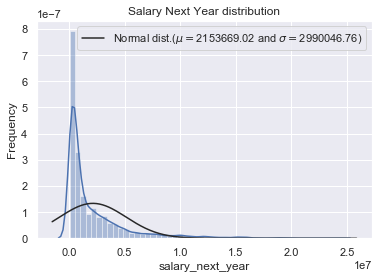

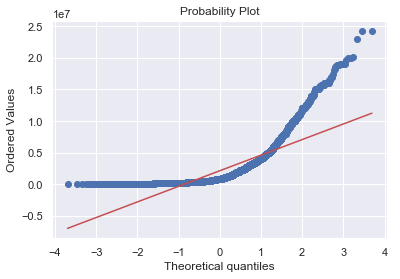

In [136]:
sns.distplot(train_data['salary_next_year'], fit = norm)

#擬合正態分布
(mu , sigma) = norm.fit(train_data['salary_next_year'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 繪圖
plt.legend(['Normal dist.($\mu = ${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Salary Next Year distribution')

#原始數據分布繪圖
fig = plt.figure()
res = stats.probplot(train_data['salary_next_year'], plot = plt)
plt.show()

> 此時的正態分布為嚴重右偏態分布，整體峰值向左偏離，並且偏度(skewness)較大，需要對目標值做log轉換，以恢復目標值的正態性。


 mu = 13.79 and sigma = 1.29



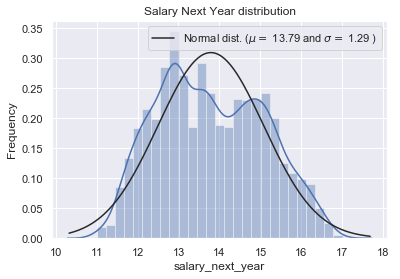

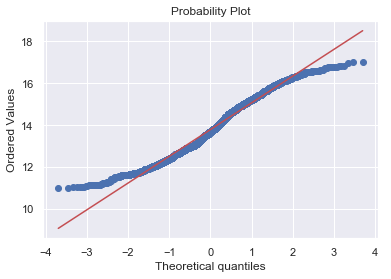

In [137]:
#使用log1p函數完成log(1+x)變換
train_data['salary_next_year'] = np.log1p(train_data['salary_next_year'])

#查看調整後的分布
sns.distplot(train_data['salary_next_year'], fit = norm)

# 重新擬合
(mu, sigma) = norm.fit(train_data['salary_next_year'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 重新繪製正态分布
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Salary Next Year distribution')

# 繪製轉變後的分布
fig = plt.figure()
res = stats.probplot(train_data['salary_next_year'], plot=plt)
plt.show()

## BAOpp:對手平均打擊率 缺失39%數據

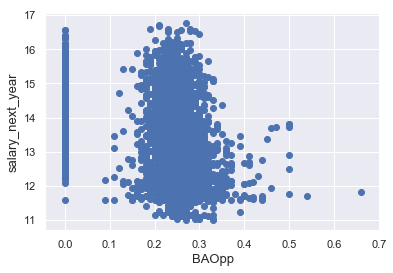

In [138]:
#繪圖
fig, ax = plt.subplots()
ax.scatter(x = train_data['BAOpp'], y = train_data['salary_next_year'])
plt.ylabel('salary_next_year', fontsize = 13)
plt.xlabel('BAOpp', fontsize = 13)
plt.show()

觀看所有資料的

In [139]:
# pairplot of numerical variables
#sns.pairplot(data=all_data)

# 畫出熱力圖比較特徵間的相關性

In [140]:
# Required parameter: dataframe ... the reference pandas dataframe
# Optional parameters: title ... (string) chart title
#                      file  ... (string) path+filename if you want to save image


def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(15,15))
    sns.set(font_scale=1)

    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(), mask=mask, annot=True, cmap='coolwarm')

    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

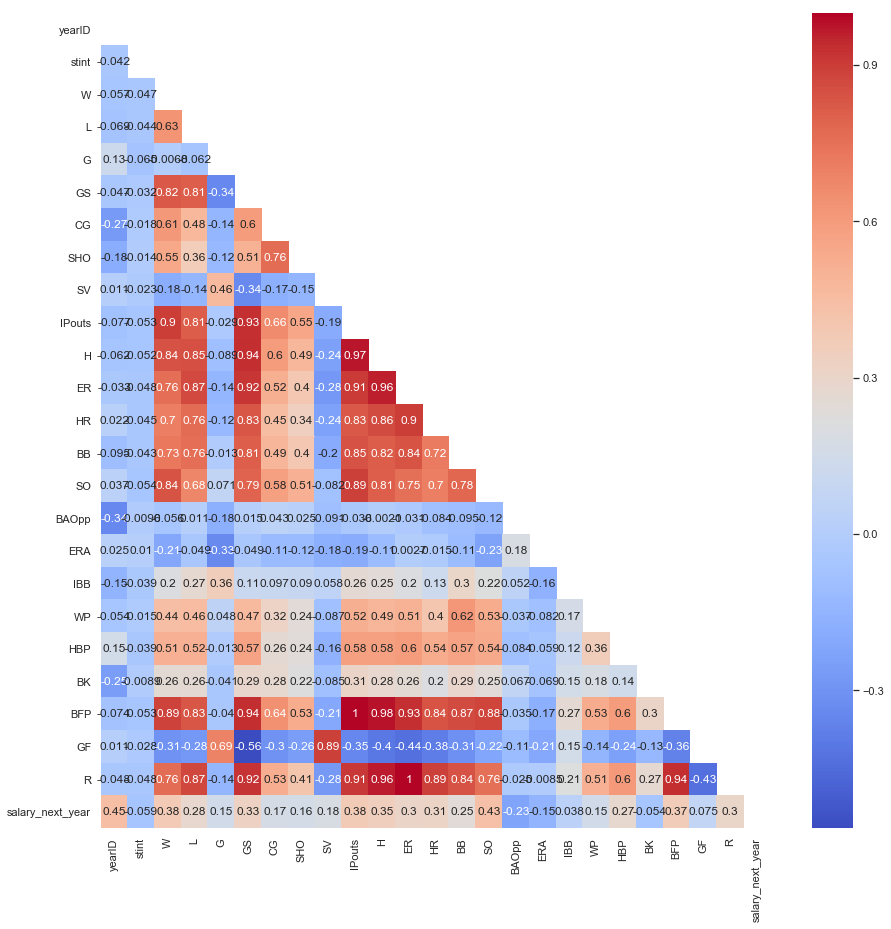

In [141]:
half_masked_corr_heatmap(train_data.drop(['SH','SF','GIDP'],axis = 1))

In [142]:
# Required parameters: dataframe ... the reference pandas dataframe
#                      target ... (string) column name of the target variable

# Optional parameters: title ... (string) chart title
#                      file  ... (string) path+filename if you want to save image

def corr_to_target(dataframe, target, title=None, file=None):
    plt.figure(figsize=(4,6))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr()[[target]].sort_values(target,
                                                ascending=False)[1:],
                annot=True,
                cmap='coolwarm')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

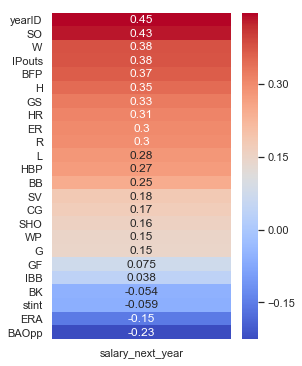

In [143]:
corr_to_target(train_data.drop(['SH','SF','GIDP'],axis = 1), 'salary_next_year') #可以看到薪資跟年代高度相關，以前的薪水跟現在的薪水不一樣

### 觀察YearID與薪資的趨勢

> 1994年聽說罷工所以停止舉辦冠軍賽 感覺與這有關

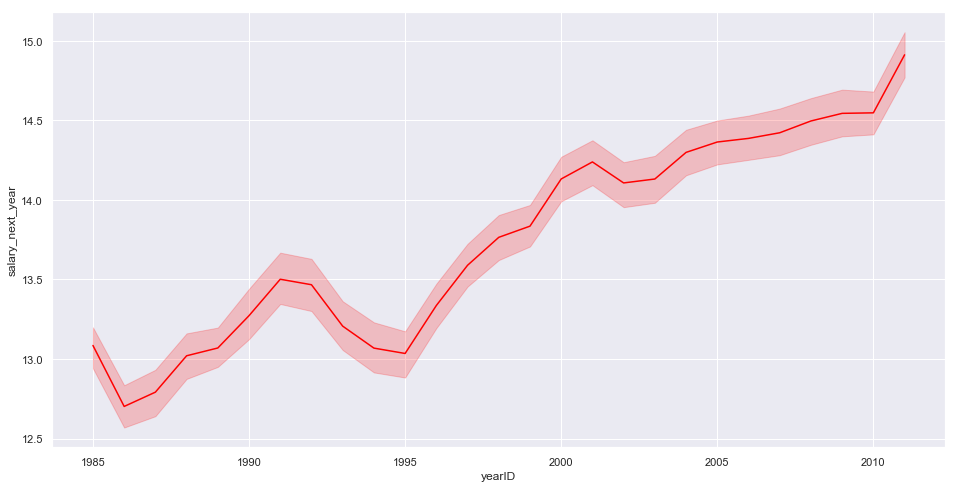

In [144]:
f, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x='yearID', y='salary_next_year', data=train_data,color = 'red') #可發現從1995年以後薪資是一路成長, 且可以用五年用一個單位

### 觀察playID 出現的次數 增加個表現的平均值 等等、同時觀察有無名星球員的可能

In [145]:
train_data['playerID'].value_counts() #平均薪資、續約次數

moyerja01    22
glavito02    19
oliveda02    18
clemero02    18
rogerke01    17
wellsda01    16
batismi01    16
rhodear01    16
timlimi01    16
stantmi02    16
tavarju01    15
wagnebi02    15
mussimi01    15
francjo01    15
smoltjo01    15
gordoto01    15
hoffmtr01    14
hawkila01    14
wittbo01     14
jonesto02    14
weathda01    14
johnsra05    14
hernaro01    14
swindgr01    14
mulhote01    14
guthrma01    14
brownke01    14
wakefti01    14
embreal01    14
oroscje01    13
             ..
ishiika01     1
dresery01     1
youngcl01     1
kerfech01     1
rzepcma01     1
mutisje01     1
prinzbr01     1
dunnemi01     1
chambjo03     1
wrighwe01     1
johnsda04     1
evelada01     1
borkoda01     1
caudibi01     1
roberwi01     1
powelro01     1
baileco01     1
perryry01     1
nippeal01     1
ottoda01      1
wainhda01     1
halldr01      1
hansegr01     1
ainswku01     1
chacigu01     1
germafr01     1
conveji01     1
medlekr01     1
cangejo01     1
mercahe01     1
Name: playerID, Length: 

### 新增選手出現的次數特徵 (訓練集與測試集分開) v2 效果不好 有overfitting的效果

In [146]:
#train_data['playerID_count'] = train_data.groupby('playerID')['playerID'].transform(lambda x:x.count())
#text = len(list(set(train_data['playerID'].values).intersection(set(test_data['playerID'].values))))
#print('訓練集跟測試集 有{}個球員重複'.format(text))
#test_data['playerID_count'] = test_data.groupby('playerID')['playerID'].transform(lambda x:x.count()) 

### 計算年資(資歷)

#### 先看一下出現最多次的投手 資歷跟薪水如何

In [147]:
moyerja01 = train_data.loc[train_data['playerID'] == 'moyerja01',:].copy()

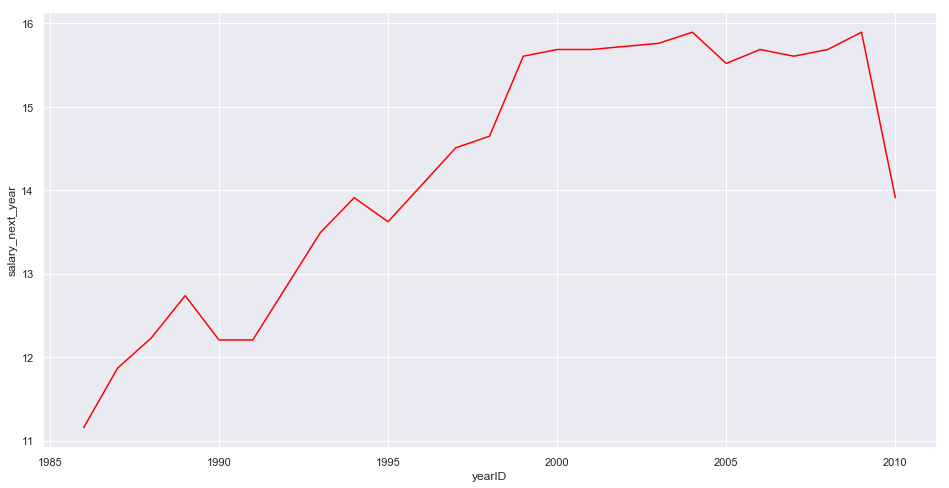

In [148]:
f, ax = plt.subplots(figsize=(16, 8)) #會發現年資整體是 隨年資成長, 但最後一年會大幅下降
sns.lineplot(x='yearID', y='salary_next_year', data=moyerja01,color = 'red') #可發現從1995年以後薪資是一路成長, 且可以用五年用一個單位

In [149]:
train_data.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary_next_year
0,nelsoge01,1986,1,CHA,AL,6,6,54,1,0,...,3.000,3.000,0.000,488.000,26.000,52,nan,nan,nan,12.808
1,moyerja01,1997,1,SEA,AL,17,5,30,30,2,...,3.000,7.000,0.000,787.000,0.000,82,nan,nan,nan,14.509
2,thompbr01,2008,1,SLN,NL,6,3,26,6,0,...,2.000,3.000,0.000,273.000,10.000,38,nan,nan,nan,13.385
3,powerte01,1986,1,CIN,NL,10,6,56,10,0,...,5.000,1.000,1.000,537.000,30.000,59,nan,nan,nan,13.122
4,osunaan01,2003,1,NYA,AL,2,5,48,0,0,...,3.000,2.000,0.000,232.000,16.000,22,nan,nan,nan,13.528


### 看playerID 平均薪資、續約次數的關係

In [150]:
#train_data['Seniority'] = train_data.groupby('playerID')['yearID'].transform(lambda x: x - x.min())

In [151]:
#ax = sns.barplot(x="Seniority", y="salary_next_year",data=train_data) #打越多場是否越有價值 明星球員的價值

In [152]:
#train_data['Seniority'] = train_data.groupby('playerID')['yearID'].transform(lambda x: x - x.min()+1)
#test_data['Seniority'] = test_data.groupby('playerID')['yearID'].transform(lambda x: x - x.min()+1)

### 加入薪資特徵

In [153]:
'''train_data['salary_mean'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.mean())
train_data['salary_max'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.max())
train_data['salary_min'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.min())
train_data['salary_std'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.std())

salary_mean = train_data.groupby('playerID')[['playerID','salary_mean']].apply(lambda i : i).drop_duplicates()
salary_max = train_data.groupby('playerID')[['playerID','salary_max']].apply(lambda i : i).drop_duplicates()
salary_min = train_data.groupby('playerID')[['playerID','salary_min']].apply(lambda i : i).drop_duplicates()
salary_std = train_data.groupby('playerID')[['playerID','salary_std']].apply(lambda i : i).drop_duplicates()

test_data['salary_mean'] = test_data['playerID'].map(dict(salary_mean.values))
test_data['salary_max'] = test_data['playerID'].map(dict(salary_max.values))
test_data['salary_min'] = test_data['playerID'].map(dict(salary_min.values))
test_data['salary_std'] = test_data['playerID'].map(dict(salary_std.values))'''

"train_data['salary_mean'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.mean())\ntrain_data['salary_max'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.max())\ntrain_data['salary_min'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.min())\ntrain_data['salary_std'] = train_data.groupby('playerID')['salary_next_year'].transform(lambda i :i.std())\n\nsalary_mean = train_data.groupby('playerID')[['playerID','salary_mean']].apply(lambda i : i).drop_duplicates()\nsalary_max = train_data.groupby('playerID')[['playerID','salary_max']].apply(lambda i : i).drop_duplicates()\nsalary_min = train_data.groupby('playerID')[['playerID','salary_min']].apply(lambda i : i).drop_duplicates()\nsalary_std = train_data.groupby('playerID')[['playerID','salary_std']].apply(lambda i : i).drop_duplicates()\n\ntest_data['salary_mean'] = test_data['playerID'].map(dict(salary_mean.values))\ntest_data['salary_max'] = test_data['pl

In [154]:
train_data = train_data.sort_values(by = 'yearID')

train_data['salary_diff'] = train_data.groupby('playerID')['salary_next_year'].apply(lambda i:i.diff(1)).fillna(0)

train_data = train_data.sort_index()

In [219]:
salary_diff

,playerID,salary_diff
0,nelsoge01,0.419
1,moyerja01,0.886
2,thompbr01,0.451
3,powerte01,0.000
4,osunaan01,-1.163
5,mulhote01,-1.386
6,wolfra02,0.415
7,rojasme01,0.817
8,marquja01,-0.081
9,pelfrmi01,2.061


In [220]:
test_data['playerID'].map(dict(salary_diff.values))

0       0.100
1       0.365
2       0.000
3       1.772
4      -0.363
5      -0.144
6       0.624
7       0.234
8       0.000
9       0.000
10      0.809
11      0.087
12     -0.262
13      1.822
14      0.542
15      0.807
16      2.439
17      0.916
18      0.000
19      0.539
20      1.253
21      0.539
22      0.843
23      1.190
24      0.529
25      1.546
26     -0.105
27     -0.470
28      0.847
29      0.114
        ...  
1079    0.000
1080    0.684
1081    0.163
1082    1.314
1083    0.000
1084    0.981
1085    0.356
1086    0.296
1087    0.302
1088    1.219
1089    0.267
1090   -0.652
1091   -1.658
1092    1.822
1093    0.000
1094    0.109
1095    1.338
1096    0.485
1097    0.796
1098   -0.033
1099    0.000
1100   -0.109
1101   -0.543
1102    0.000
1103    0.170
1104   -0.416
1105    0.668
1106    1.010
1107    0.000
1108    0.547
Name: playerID, Length: 1109, dtype: float64

In [155]:
salary_diff = train_data.groupby('playerID')[['playerID','salary_diff']].apply(lambda i : i).drop_duplicates()

test_data['salary_diff'] = test_data['playerID'].map(dict(salary_diff.values))

### 結合資料

In [156]:
ntrain = train_data.shape[0] 
ntest = test_data.shape[0] #方便之後 訓練時資料切割
target = train_data.salary_next_year.values

all_data = pd.concat([train_data,test_data], ignore_index=True)
all_data.drop(['salary_next_year'],axis = 1, inplace = True)

print("全部數據集的維度",all_data.shape)

全部數據集的維度 (7393, 31)


### 什麼樣的情況下, 球團更願意加薪水? - 
1. 判斷是否為當年的冠軍隊伍
2. 誰是明星球員, 他們的分布如何
3. 今年的表現決定明年的結果(加熱薪資特徵)

In [157]:
train_data['teamID'].value_counts()

PIT    244
SLN    244
TOR    237
NYA    235
SFN    233
LAN    231
NYN    230
CHA    227
PHI    225
CLE    225
SDN    224
CHN    224
OAK    223
ATL    222
BOS    220
MIN    217
TEX    215
CIN    209
DET    207
HOU    204
BAL    201
SEA    197
KCA    190
FLO    175
COL    172
MON    164
MIL    106
ARI    104
TBA    103
CAL     98
ML4     90
ANA     76
LAA     69
WAS     43
Name: teamID, dtype: int64

In [158]:
champion = pd.read_csv('champion.csv')

In [159]:
champion

,yearID,teamID,Champion
0,1985,KCA,1
1,1986,BOS,1
2,1987,MIN,1
3,1988,OAK,1
4,1989,OAK,2
5,1990,OAK,3
6,1991,MIN,1
7,1992,TOR,1
8,1993,TOR,2
9,1995,CLE,1


In [160]:
all_data.loc[(all_data['yearID'] == 1985) & (all_data['teamID'] == 'KCA'),:]

,BAOpp,BB,BFP,BK,CG,ER,ERA,G,GF,GIDP,...,SO,SV,W,WP,lgID,playerID,salary_diff,stint,teamID,yearID
345,0.280,16,532.000,0.000,0,34,2.370,84,76.000,nan,...,54,37,8,0.000,AL,quiseda01,0.000,1,KCA,1985
640,0.260,76,893.000,2.000,4,79,3.420,32,0.000,nan,...,114,0,14,4.000,AL,jacksda02,0.000,1,KCA,1985
751,0.260,59,885.000,1.000,5,99,4.330,33,0.000,nan,...,122,0,10,9.000,AL,blackbu02,0.000,1,KCA,1985
2427,0.240,68,983.000,3.000,8,71,2.690,33,0.000,nan,...,108,0,17,4.000,AL,leibrch01,0.000,1,KCA,1985
6473,0.230,77,760.000,0.000,0,80,4.060,29,0.000,nan,...,99,0,14,12.000,AL,gubicma01,-0.511,1,KCA,1985
6971,0.240,38,931.000,3.000,10,75,2.870,32,0.000,nan,...,158,0,20,1.000,AL,saberbr01,0.180,1,KCA,1985


In [161]:
all_data.head()

,BAOpp,BB,BFP,BK,CG,ER,ERA,G,GF,GIDP,...,SO,SV,W,WP,lgID,playerID,salary_diff,stint,teamID,yearID
0,0.270,41,488.000,0.000,0,49,3.850,54,26.000,nan,...,70,6,6,3.000,AL,nelsoge01,0.419,1,CHA,1986
1,0.250,43,787.000,0.000,2,81,3.860,30,0.000,nan,...,113,0,17,3.000,AL,moyerja01,0.886,1,SEA,1997
2,nan,19,273.000,0.000,0,37,5.150,26,10.000,nan,...,32,0,6,2.000,NL,thompbr01,0.451,1,SLN,2008
3,0.240,52,537.000,1.000,0,53,3.700,56,30.000,nan,...,95,1,10,5.000,NL,powerte01,0.000,1,CIN,1986
4,0.280,20,232.000,0.000,0,21,3.730,48,16.000,nan,...,47,0,2,3.000,AL,osunaan01,-1.163,1,NYA,2003


### 看一下資歷跟年薪的關係 並創建特徵

In [162]:
all_data['Seniority'] = all_data.groupby('playerID')['yearID'].transform(lambda x: x - x.min()+1)

In [163]:
train1 = all_data[:ntrain]
train1['target'] = train_data['salary_next_year']

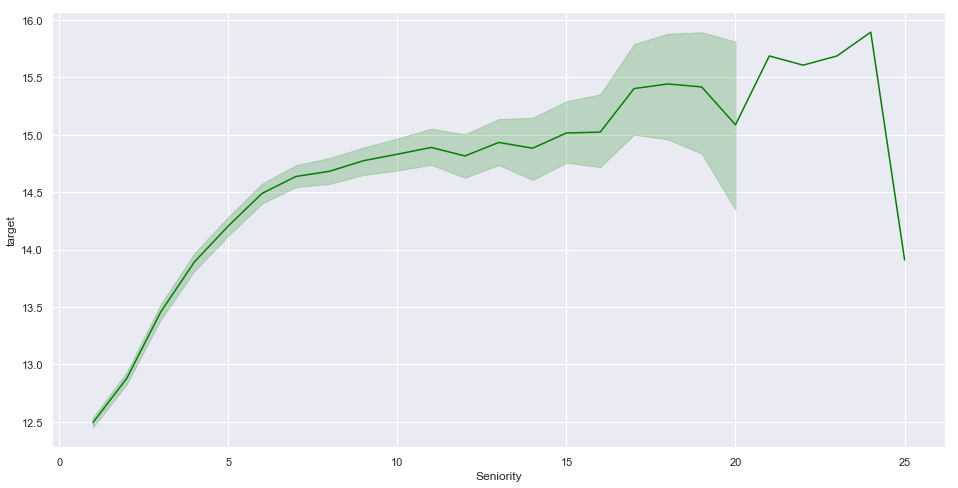

In [164]:
f, ax = plt.subplots(figsize=(16, 8)) #會發現年資整體是 隨年資成長, 但最後一年會大幅下降
sns.lineplot(x='Seniority', y='target', data=train1,color = 'green') #可發現從1995年以後薪資是一路成長, 且可以用五年用一個單位

1. 考慮到13-15為一桶
2. 0-11 為一桶
3. 11-13為一桶
4. 15 - 17.5為一桶
5. 17.5 - 25為一桶

In [165]:
bin=[0,6,11,16,17,20,24,26]
all_data['Seniority'] = pd.cut(all_data['Seniority'],bin)

In [166]:
all_data['Seniority'] =all_data['Seniority'].astype('str')

In [167]:
all_data['Seniority'].value_counts()

(0, 6]      5260
(6, 11]     1647
(11, 16]     420
(17, 20]      35
(16, 17]      25
(20, 24]       5
(24, 26]       1
Name: Seniority, dtype: int64

In [168]:
all_data['Seniority'] = all_data['Seniority'].apply(lambda x : 4 if x  == '(0, 6]' else x)
all_data['Seniority'] = all_data['Seniority'].apply(lambda x : 2 if x  == '(6, 11]' else x)
all_data['Seniority'] = all_data['Seniority'].apply(lambda x : 1 if x  == '(11, 16]' else x)
all_data['Seniority'] = all_data['Seniority'].apply(lambda x : -1 if x  == '(17, 20]' else x)
all_data['Seniority'] = all_data['Seniority'].apply(lambda x : 2 if x  == '(16, 17]' else x)
all_data['Seniority'] = all_data['Seniority'].apply(lambda x : 3 if x  == '(20, 24]' else x)
all_data['Seniority'] = all_data['Seniority'].apply(lambda x : -1 if x  == '(24, 26]' else x)

In [169]:
all_data['Seniority'].value_counts()

 4    5260
 2    1672
 1     420
-1      36
 3       5
Name: Seniority, dtype: int64

# 資料前處理

1. 異常值處理
2. 填補缺失值
3. 資料轉換
4. 特徵選擇
5. 資料拆分

### 1. 缺失值處理

Text(0.5, 1.0, 'Percent missing data by feature')

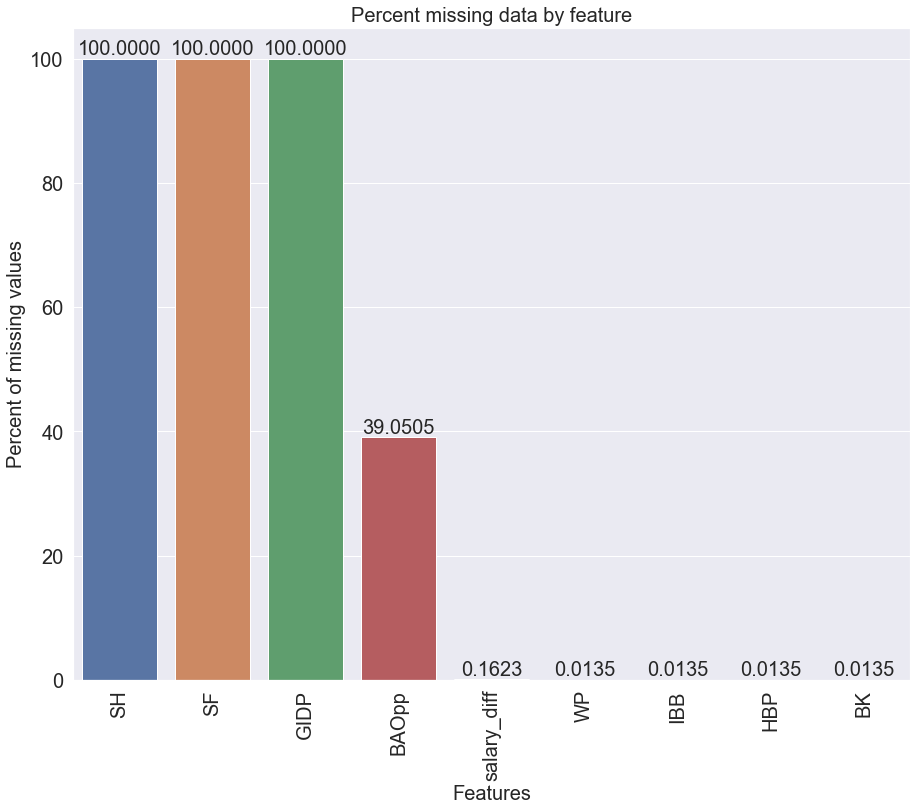

In [170]:
all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})

f, ax = plt.subplots(figsize = (15,12))
plt.xticks(rotation = '90',fontsize = 20)
plt.yticks(fontsize = 20)
sns.barplot(x = all_data_na.index, y = all_data_na)
for a,b in enumerate(all_data_na):
    plt.text(a, b, '%.4f' % b, ha='center', va= 'bottom',fontsize=20)
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Percent of missing values', fontsize = 20)
plt.title('Percent missing data by feature', fontsize = 20)

In [171]:
all_data.drop(['SH','SF','GIDP'], axis = 1, inplace = True) #刪除掉完全沒有值的資料欄位

In [172]:
#all_data.fillna(all_data['BAOpp'].mean(),inplace = True)

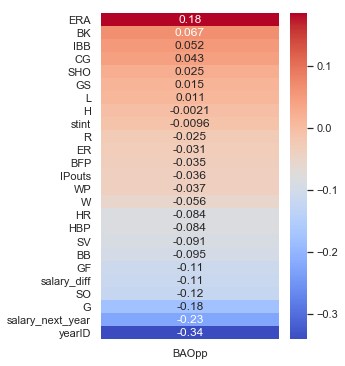

In [173]:
corr_to_target(train_data[~train_data['BAOpp'].isnull()].drop(['SH','SF','GIDP'],axis = 1), 'BAOpp') #可以看到薪資跟年代高度相關，以前的薪水跟現在的薪水不一樣

### 用LinearRegression 填補缺失值

In [174]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data = all_data[['ERA','yearID','G','SO','GF','BB','SV','BAOpp']]
#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
x_train = data[data['BAOpp'].notnull()].drop(columns='BAOpp')
y_train = data[data['BAOpp'].notnull()]['BAOpp']
x_test = data[data['BAOpp'].isnull()].drop(columns='BAOpp')
y_test = data[data['BAOpp'].isnull()]['BAOpp']
#Step-2: Train the machine learning algorithm
linreg.fit(x_train, y_train)
#Step-3: Predict the missing values in the attribute of the test data.
predicted = linreg.predict(x_test)
#Step-4: Let’s obtain the complete dataset by combining with the target attribute.
all_data.BAOpp[all_data.BAOpp.isnull()] = predicted


In [175]:
all_data = all_data.fillna(0)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7393 entries, 0 to 7392
Data columns (total 29 columns):
BAOpp          7393 non-null float64
BB             7393 non-null int64
BFP            7393 non-null float64
BK             7393 non-null float64
CG             7393 non-null int64
ER             7393 non-null int64
ERA            7393 non-null float64
G              7393 non-null int64
GF             7393 non-null float64
GS             7393 non-null int64
H              7393 non-null int64
HBP            7393 non-null float64
HR             7393 non-null int64
IBB            7393 non-null float64
IPouts         7393 non-null int64
L              7393 non-null int64
R              7393 non-null int64
SHO            7393 non-null int64
SO             7393 non-null int64
SV             7393 non-null int64
W              7393 non-null int64
WP             7393 non-null float64
lgID           7393 non-null object
playerID       7393 non-null object
salary_diff    7393 non-null float6

# 可再改進

In [176]:
all_data['WP'].fillna(value=all_data['WP'].mean(), inplace=True)
all_data['IBB'].fillna(value=all_data['IBB'].mean(), inplace=True)
all_data['HBP'].fillna(value=all_data['HBP'].mean(), inplace=True)
all_data['BK'].fillna(value=all_data['BK'].mean(), inplace=True)  

###  2. Feature Creation

* W:勝場次
* L:敗場次
* G:出場次數
* GS:球員是先發投手的次數
* CG:投手獨力投完全場的比賽次數
* SHO:投完整場比賽，且沒有失去任何分數的次數
* SV:救援成功次數(投手沒有搞砸球隊優勢)
* IPouts:投球局數*3
* H:被安打數
* ER:自責分
* HR:被全壘打數
* BB:四壞保送次數
* SO:三振次數
* BAOpp:對手平均打擊率
* ERA:防禦率
* IBB:四壞球次數
* WB:暴投次數
* HBP:觸身球次數
* BK:投手犯規次數
* BFP:單一投手面臨多少打者
* GF:完成比賽之次數(記於最後一任投手上)
* R:打擊分數總計

### 投手指標
#### 建立WHIP指標  參考資料 https://www.sportsv.net/articles/10241

> 算法是保送(BB)+安打(H)/局數(IP)

In [177]:
all_data['WHIP'] = (all_data.BB + all_data.H)/ (all_data.IPouts/3)

#### 建立DICE指標
>DICE = 3 + (3*(BB + HBP) + 13*HR - 2*K) / IP

In [178]:
all_data['DICE'] = 3 + (3*(all_data.BB + all_data.HBP) + all_data.HR * 13 - 2 * all_data.BB)/(all_data.IPouts/3)

#### 建立SO_9指標
> 公式很簡單：SO/IP×9，這個定義是「投手每投九局能取得多少三振」。

In [179]:
all_data['SO_9'] = all_data.SO / (all_data.IPouts*3)

#### 建立BB_9指標
> 算法為：(BB+HBP)/IP×9

In [180]:
all_data['BB_9'] = (all_data.BB + all_data.HBP) /  (all_data.IPouts*3)

In [181]:
column = ['W', 'L', 'G', 'GS','CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R','WHIP', 'DICE', 'SO_9',
       'BB_9']

In [182]:
for x in column:
    all_data[x + '_mean'] = all_data.groupby('playerID')[x].transform(lambda x:x.mean()) 

In [183]:
train_data.shape #效果不好

(6284, 32)

### 將前一年的表現減去後一年的表現

In [184]:
all_data = all_data.sort_values(by = 'yearID')

In [185]:
for x in column:
    all_data[x + '_diff_last_year'] = all_data.groupby('playerID')[x].apply(lambda i:i.diff(1)).fillna(0)

In [186]:
all_data = all_data.sort_index()

In [187]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7393 entries, 0 to 7392
Data columns (total 85 columns):
BAOpp                    7393 non-null float64
BB                       7393 non-null int64
BFP                      7393 non-null float64
BK                       7393 non-null float64
CG                       7393 non-null int64
ER                       7393 non-null int64
ERA                      7393 non-null float64
G                        7393 non-null int64
GF                       7393 non-null float64
GS                       7393 non-null int64
H                        7393 non-null int64
HBP                      7393 non-null float64
HR                       7393 non-null int64
IBB                      7393 non-null float64
IPouts                   7393 non-null int64
L                        7393 non-null int64
R                        7393 non-null int64
SHO                      7393 non-null int64
SO                       7393 non-null int64
SV                      

### 3. 不符合正態，將其做log轉換

In [188]:
col2 = ['W', 'L', 'G', 'GS','CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R','Seniority', 'W_mean',
       'L_mean', 'G_mean', 'GS_mean', 'CG_mean', 'SHO_mean', 'SV_mean',
       'IPouts_mean', 'H_mean', 'ER_mean', 'HR_mean', 'BB_mean', 'SO_mean',
       'BAOpp_mean', 'ERA_mean', 'IBB_mean', 'WP_mean', 'HBP_mean', 'BK_mean',
       'BFP_mean', 'GF_mean', 'R_mean', 'WHIP', 'DICE', 'SO_9',
       'BB_9']

In [189]:
log_data = all_data[col2]
numeric_feats = log_data.dtypes[log_data.dtypes != 'object'].index

#對所有數執行特徵進行skew計算偏度
skewed_feats = log_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print('\n Skew in numerical features: \n')
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head()


 Skew in numerical features: 



,Skew
ERA,14.679
BB_9,12.468
WHIP,10.957
ERA_mean,5.931
DICE,5.249


In [190]:
skewness = skewness[abs(skewness)>0.75]
print('總共有{}數值型的特徵做轉換'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat],lam)

總共有49數值型的特徵做轉換


### 4. one-hotencoding 

#### 年份對下年薪資高度相關，因此對年份進行分桶

In [191]:
bin=[1984,1990,1995,2000,2005,2010,2013]
all_data['yearID'] = pd.cut(all_data['yearID'],bin)

In [192]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(list(all_data['yearID'].values))
all_data['yearID'] = lbl.transform(list(all_data['yearID'].values))

#### 對teamID做one-hotencoding

In [193]:
all_data['teamID'].value_counts() #分布平均

PIT    286
TOR    283
SLN    277
CHN    272
NYA    271
NYN    269
SDN    269
OAK    269
SFN    269
LAN    268
PHI    266
CLE    264
CHA    263
BOS    262
ATL    261
CIN    254
TEX    251
MIN    249
DET    244
SEA    241
HOU    238
BAL    237
KCA    223
FLO    203
COL    201
MON    193
ARI    128
TBA    126
CAL    120
MIL    120
ML4    107
ANA     89
LAA     72
WAS     48
Name: teamID, dtype: int64

In [194]:
teamID = pd.get_dummies(all_data['teamID'],prefix= 'team_')#做one-hotecoding
all_data = pd.concat([all_data,teamID],axis=1, join_axes=[all_data.index])
all_data.drop(['teamID'],axis = 1,inplace = True)

#### 對lgID做one-hotencoding

In [195]:
all_data['lgID'].value_counts() #分布平均

NL    3822
AL    3571
Name: lgID, dtype: int64

In [196]:
lgID = pd.get_dummies(all_data['lgID'],prefix= 'lgID_')#做one-hotecoding
all_data = pd.concat([all_data,lgID],axis=1, join_axes=[all_data.index])
all_data.drop(['lgID'],axis = 1,inplace = True)

### 5. 獲得新的訓練與測試集。至此，特徵工程處理完畢。

In [197]:
all_data.drop(['playerID', 'stint'],axis = 1,inplace = True) #暫時先刪除 太稀疏的特徵

In [198]:
all_data.columns

Index(['BAOpp', 'BB', 'BFP', 'BK', 'CG', 'ER', 'ERA', 'G', 'GF', 'GS',
       ...
       'team__SDN', 'team__SEA', 'team__SFN', 'team__SLN', 'team__TBA',
       'team__TEX', 'team__TOR', 'team__WAS', 'lgID__AL', 'lgID__NL'],
      dtype='object', length=117)

# 模型訓練

In [199]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

In [200]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [201]:
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [202]:
#交叉驗證數
n_folds = 5

def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    mae= -cross_val_score(model, train, target, scoring="neg_mean_absolute_error"
                                   , cv = kf)
    return(mae)

# def rmse(y, y_pred):
#     return np.sqrt(mean_squared_error(np.log(y), y_pred)))

# 模型評估

1. LASSO Regression: *該模型對異常值很敏感，所以我們在pipeline上使用sklearn的Robustscaler()方法

In [203]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

2. Elastic Net Regression: 同樣讓他對異常值具有更好的魯棒性

In [204]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = .9, random_state = 3))

3. Kernel Ridge Regression:

In [205]:
KRR = KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0 = 2.5)

4. Gradient Boosting Regression:
    * 由於Huber loss使得他對於異常值具有魯棒性

In [206]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

5. XGBoost:

In [207]:
xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

6. LightGBM:

In [208]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

來看看各個模型交叉驗證的得分:

In [209]:
score = mae_cv(lasso) #Lasso 得分: 0.6469 (0.0083)
print("\nLasso 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso 得分: 0.6345 (0.0139)



In [210]:
score = mae_cv(ENet)  # ElasticNet 得分: 0.6469 (0.0083)
print("ElasticNet 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet 得分: 0.6344 (0.0140)



In [211]:
score = mae_cv(KRR) #Kernel Ridge 得分: 0.6040 (0.0130)
print("Kernel Ridge 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge 得分: 0.5586 (0.0164)



In [212]:
score = mae_cv(GBoost) #  0.7310 (0.0137)
print("Gradient Boosting 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting 得分: 0.4605 (0.0075)



In [213]:
score = mae_cv(model_xgb) #0.7312 (0.0166)
print("Xgboost 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost 得分: 0.4697 (0.0108)



In [214]:
score = mae_cv(model_lgb) #  0.7258 (0.0139)
print("LGBM 得分: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM 得分: 0.4845 (0.0063)



# 6. 模型融合

Stacking模型融合：Average-Stacking
簡單的平均基本模型的方法。

In [215]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 用數據擬合所有的模型
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # 對結果做average
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [216]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = mae_cv(averaged_models)
print(" 最集成後的模型的得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 最集成後的模型的得分: 0.5365 (0.0117)



Meta-model Stacking： 在這種方法中，我們在平均基礎模型上添加Meta-model，並使用這些基模型的out-of-folds預測來訓練我們的Meta-model。 訓練部分的步驟如下： 1、將整個訓練集分解成兩個不相交的集合（這裡是train和.holdout）。 2、在第一部分（train）上訓練幾個基本模型。 3、在第二個部分（holdout）上測試這些基本模型。 4、使用(3)中的預測（稱為 out-of-fold 預測）作為輸入，並將正確的標籤（目標變量）作為輸出來訓練更高層次的學習模型稱為元模型。 前三個步驟是迭代完成的。例如，如果我們採取5倍的fold，我們首先將訓練數據分成5次。然後我們會做5次迭代。在每次迭代中，我們訓練每個基礎模型4倍，並預測剩餘的fold（holdout fold）。

In [217]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # 用數據擬合所有的模型
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # 得到元模型，並用元模型對out_of_fold做预估，為學習stacking的第2層做數據準備
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # 學習stacking模型
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    # 做stacking预估
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [218]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = mae_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

KeyboardInterrupt: 

In [ ]:
def mae(y, y_pred):
    return np.sqrt(mean_absolute_error(y, y_pred))

In [ ]:
#StackedRegressor:
stacked_averaged_models.fit(train, target)
stacked_train_pred = stacked_averaged_models.predict(train)
stacked_pred = np.expm1(stacked_averaged_models.predict(test))
print(mae(target, stacked_train_pred))

In [ ]:
#XGBoost:
model_xgb.fit(train, target)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(mae(target, xgb_train_pred))

In [ ]:
#LightGBM:
model_lgb.fit(train, target)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(mae(target, lgb_train_pred))

In [ ]:
'''RMSE on the entire Train data when averaging'''

print('訓練集上的mae得分:')
print(mae(target,stacked_train_pred*0.70 +
               xgb_train_pred*0.15  + lgb_train_pred*0.15 ))

#### 將三者進行融合，然後得到Ensemble prediction：

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
ensemble.shape

In [ ]:
test_ID.shape

In [ ]:
sub = pd.DataFrame()

sub['id'] = test_ID
sub['salary_next_year'] = ensemble
sub.to_csv('submission14.csv',index=False)